<a href="https://colab.research.google.com/github/Arnajakk/BIA_Project/blob/main/AMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction using CNN-LSTM model

In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing and Analysis

In [3]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [4]:
path = '/content/drive/MyDrive/BI Project/predictive/18 Symbols'
stock_name = 'AMD'
raw_data = pd.read_csv(path+'/'+stock_name+'.csv')
data = raw_data[:755]
data2 = raw_data[755:]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
1,2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2,2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
3,2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
4,2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [6]:
raw_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,53.415362,54.462731,52.339722,53.438570,53.438570,6.592750e+07
std,35.949697,36.621210,35.252936,35.965374,35.965374,3.538459e+07
min,9.080000,9.770000,9.040000,9.530000,9.530000,1.670590e+07
25%,23.775000,24.280000,23.285000,23.695000,23.695000,4.275060e+07
50%,42.630001,43.910000,42.150002,42.830002,42.830002,5.522760e+07
75%,82.275002,83.589996,80.829998,82.235001,82.235001,7.871740e+07
max,163.279999,164.460007,156.100006,161.910004,161.910004,3.250584e+08


In [7]:
raw_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

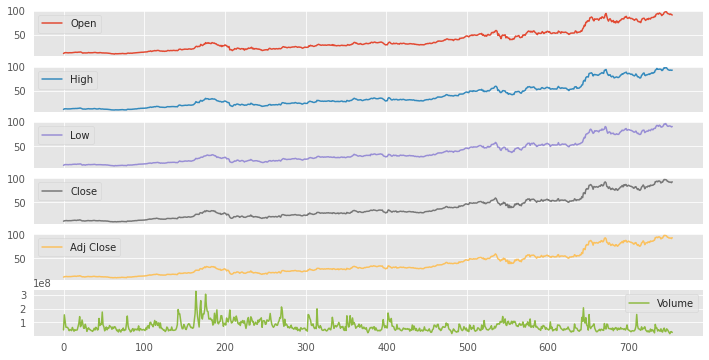

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


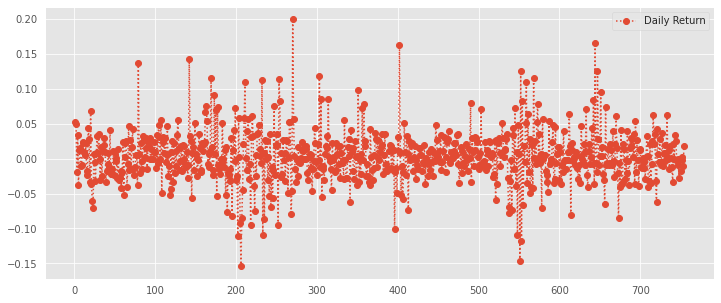

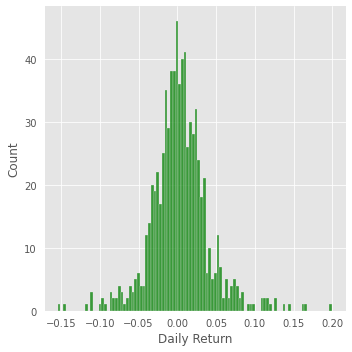

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


           Date       Open       High        Low      Close  Adj Close  \
0    2018-01-02  10.420000  11.020000  10.340000  10.980000  10.980000   
1    2018-01-03  11.610000  12.140000  11.360000  11.550000  11.550000   
2    2018-01-04  12.100000  12.430000  11.970000  12.120000  12.120000   
3    2018-01-05  12.190000  12.220000  11.660000  11.880000  11.880000   
4    2018-01-08  12.010000  12.300000  11.850000  12.280000  12.280000   
..          ...        ...        ...        ...        ...        ...   
750  2020-12-23  93.080002  93.129997  91.459999  91.550003  91.550003   
751  2020-12-24  91.800003  92.510002  91.309998  91.809998  91.809998   
752  2020-12-28  92.930000  93.139999  90.820000  91.599998  91.599998   
753  2020-12-29  91.660004  92.459999  89.430000  90.620003  90.620003   
754  2020-12-30  90.779999  92.849998  90.190002  92.290001  92.290001   

        Volume  MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0     44146300       37.411007 

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

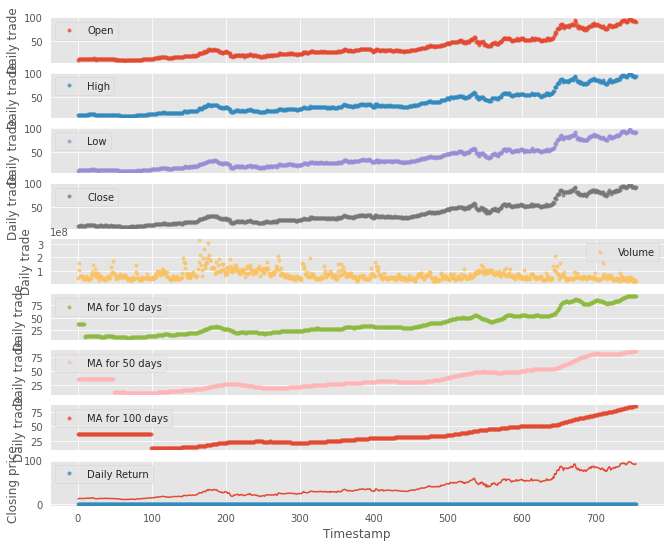

In [8]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

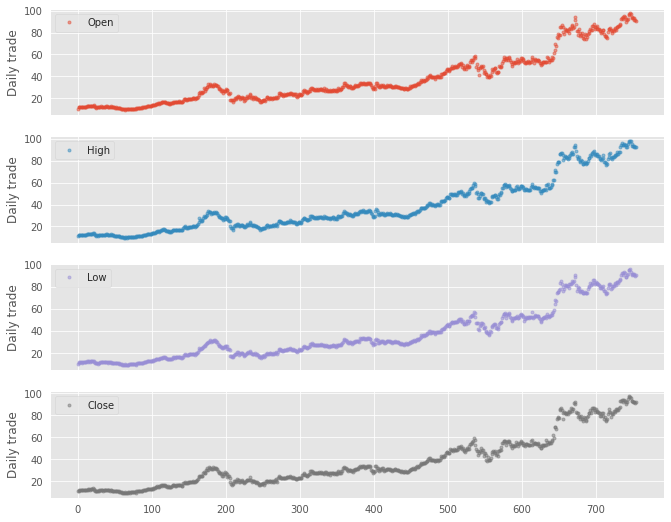

In [9]:
# After that, we'll visualize the data for understanding, this is shown below...
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

           Date       Open       High        Low      Close  Adj Close  \
0    2018-01-02  10.420000  11.020000  10.340000  10.980000  10.980000   
1    2018-01-03  11.610000  12.140000  11.360000  11.550000  11.550000   
2    2018-01-04  12.100000  12.430000  11.970000  12.120000  12.120000   
3    2018-01-05  12.190000  12.220000  11.660000  11.880000  11.880000   
4    2018-01-08  12.010000  12.300000  11.850000  12.280000  12.280000   
..          ...        ...        ...        ...        ...        ...   
750  2020-12-23  93.080002  93.129997  91.459999  91.550003  91.550003   
751  2020-12-24  91.800003  92.510002  91.309998  91.809998  91.809998   
752  2020-12-28  92.930000  93.139999  90.820000  91.599998  91.599998   
753  2020-12-29  91.660004  92.459999  89.430000  90.620003  90.620003   
754  2020-12-30  90.779999  92.849998  90.190002  92.290001  92.290001   

        Volume  MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0     44146300       37.411007 

,count,mean,std,min,25%,50%,75%,max
Open,755.0,3.756644e+01,2.324273e+01,9.080000e+00,1.991500e+01,3.037000e+01,5.125000e+01,9.755000e+01
High,755.0,3.834723e+01,2.362852e+01,9.770000e+00,2.040500e+01,3.089000e+01,5.212500e+01,9.798000e+01
Low,755.0,3.675256e+01,2.278013e+01,9.040000e+00,1.925500e+01,2.977000e+01,4.981500e+01,9.625000e+01
Close,755.0,3.758420e+01,2.323613e+01,9.530000e+00,1.988000e+01,3.028000e+01,5.157000e+01,9.712000e+01
Adj Close,755.0,3.758420e+01,2.323613e+01,9.530000e+00,1.988000e+01,3.028000e+01,5.157000e+01,9.712000e+01
Volume,755.0,7.085866e+07,3.684469e+07,1.670590e+07,4.566550e+07,6.027590e+07,8.472290e+07,3.250584e+08
MA for 10 days,755.0,3.741101e+01,2.268732e+01,9.767000e+00,2.020100e+01,3.061900e+01,5.085450e+01,9.429100e+01
MA for 50 days,755.0,3.664577e+01,2.026711e+01,1.079420e+01,2.188980e+01,3.105980e+01,4.841580e+01,8.671000e+01
MA for 100 days,755.0,3.585301e+01,1.740007e+01,1.154400e+01,2.294645e+01,3.215310e+01,4.541315e+01,8.438740e+01
Daily Return,755.0,3.518838e-03,3.736778e-02,-1.544537e-01,-1.591952e-02,2.024241e-03,2.186065e-02,1.994805e-01


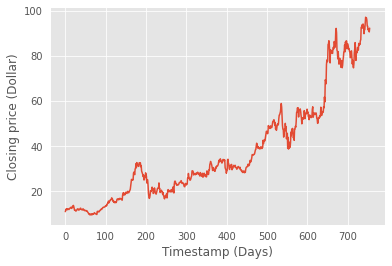

In [10]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp (Days)")
plt.ylabel("Closing price (Dollar)")
df = data
print(df)

df.describe().transpose()

In [11]:
# The data has been analysed but it must be converted into data of shape [100,1] 
# to make it easier for CNN to train on... Else it won't select necessary features and the model will fail
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

522
131


# Training

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

In [12]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
14/14 [==============================] - 12s 174ms/step - loss: 0.1862 - mse: 0.1862 - mae: 0.3015 - val_loss: 0.0965 - val_mse: 0.0965 - val_mae: 0.2156
Epoch 2/40
14/14 [==============================] - 0s 34ms/step - loss: 0.0938 - mse: 0.0938 - mae: 0.2108 - val_loss: 0.0770 - val_mse: 0.0770 - val_mae: 0.1993
Epoch 3/40
14/14 [==============================] - 1s 36ms/step - loss: 0.0676 - mse: 0.0676 - mae: 0.1758 - val_loss: 0.0677 - val_mse: 0.0677 - val_mae: 0.1887
Epoch 4/40
14/14 [==============================] - 0s 35ms/step - loss: 0.0769 - mse: 0.0769 - mae: 0.1886 - val_loss: 0.0577 - val_mse: 0.0577 - val_mae: 0.1690
Epoch 5/40
14/14 [==============================] - 1s 37ms/step - loss: 0.0549 - mse: 0.0549 - mae: 0.1580 - val_loss: 0.0473 - val_mse: 0.0473 - val_mae: 0.1527
Epoch 6/40
14/14 [==============================] - 0s 35ms/step - loss: 0.0497 - mse: 0.0497 - mae: 0.1484 - val_loss: 0.0500 - val_mse: 0.0500 - val_mae: 0.1664
Epoch 7/40
14/14 [==

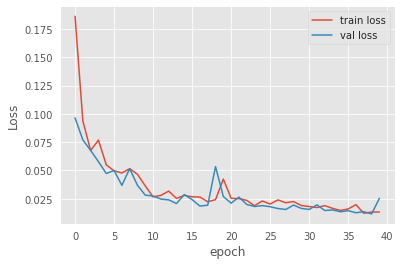

In [13]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

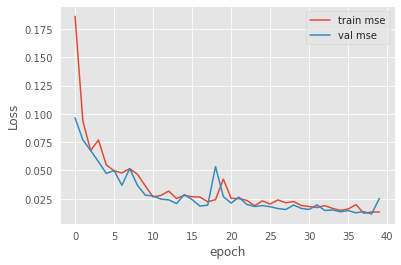

In [14]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

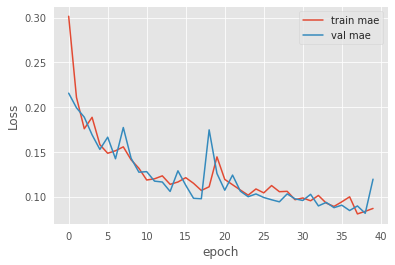

In [15]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [16]:
model.evaluate(test_X, test_Y)

5/5 [==============================] - 0s 8ms/step - loss: 0.0253 - mse: 0.0253 - mae: 0.1195


[0.02534138597548008, 0.02534138597548008, 0.11948201805353165]

In [17]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.888618
R2 Score: 0.888618
Max Error: 0.529220


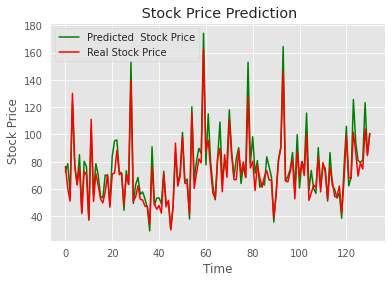

In [18]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing

In [19]:
# First we need to save a model
model.save("model.h5")

In [20]:
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [21]:
df2 = raw_data[655:]
X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.99, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2
248


In [22]:
model.evaluate(test_X, test_Y)

8/8 [==============================] - 0s 9ms/step - loss: 0.0224 - mse: 0.0224 - mae: 0.1204


[0.0223606638610363, 0.0223606638610363, 0.12041831016540527]

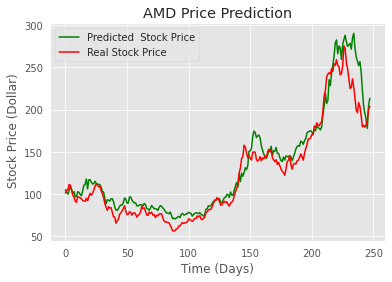

In [23]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(stock_name+' Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel(' Stock Price (Dollar)')
plt.legend()
plt.show()